Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library(tidymodels)



── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:

glimpse(diabetes_train)


Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 4, 10, 3, 1, 13, 5, 11, 3, 7, 7, 7, 1, …
$ Glucose                  <dbl> 85, 116, 110, 139, 126, 97, 145, 109, 138, 18…
$ BloodPressure            <dbl> 66, 74, 92, 80, 88, 66, 82, 75, 76, 64, 84, 9…
$ SkinThickness            <dbl> 29, 0, 0, 0, 41, 15, 19, 26, 0, 25, 0, 18, 0,…
$ Insulin                  <dbl> 0, 0, 0, 0, 235, 140, 110, 0, 0, 70, 0, 0, 0,…
$ BMI                      <dbl> 26.6, 25.6, 37.6, 27.1, 39.3, 23.2, 22.2, 36.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.201, 0.191, 1.441, 0.704, 0.487, 0.2…
$ Age                      <dbl> 31, 30, 30, 57, 27, 22, 57, 60, 35, 26, 37, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

Outcome

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

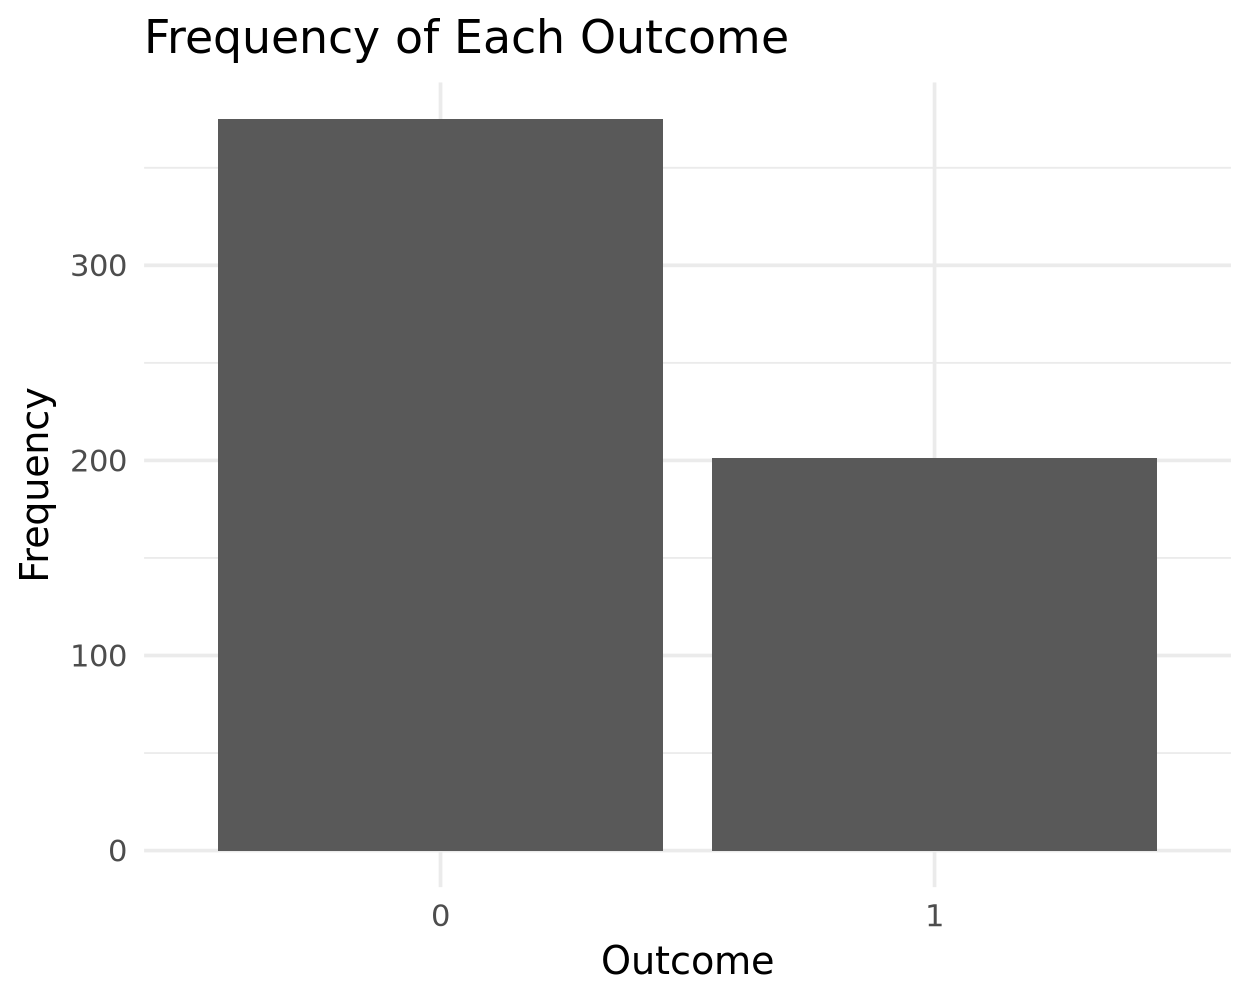

In [4]:
ggplot(data = diabetes_train, aes(x = factor(Outcome))) +
  geom_bar() +
  labs(title = "Frequency of Each Outcome",
       x = "Outcome",
       y = "Frequency") +
  theme_minimal()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**


No, we have more 0's than 1's


Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [52]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,116.0
0,BMI,25.6
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

In [50]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,116.0
0,BMI,25.6
0,Glucose,110.0
0,BMI,37.6


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

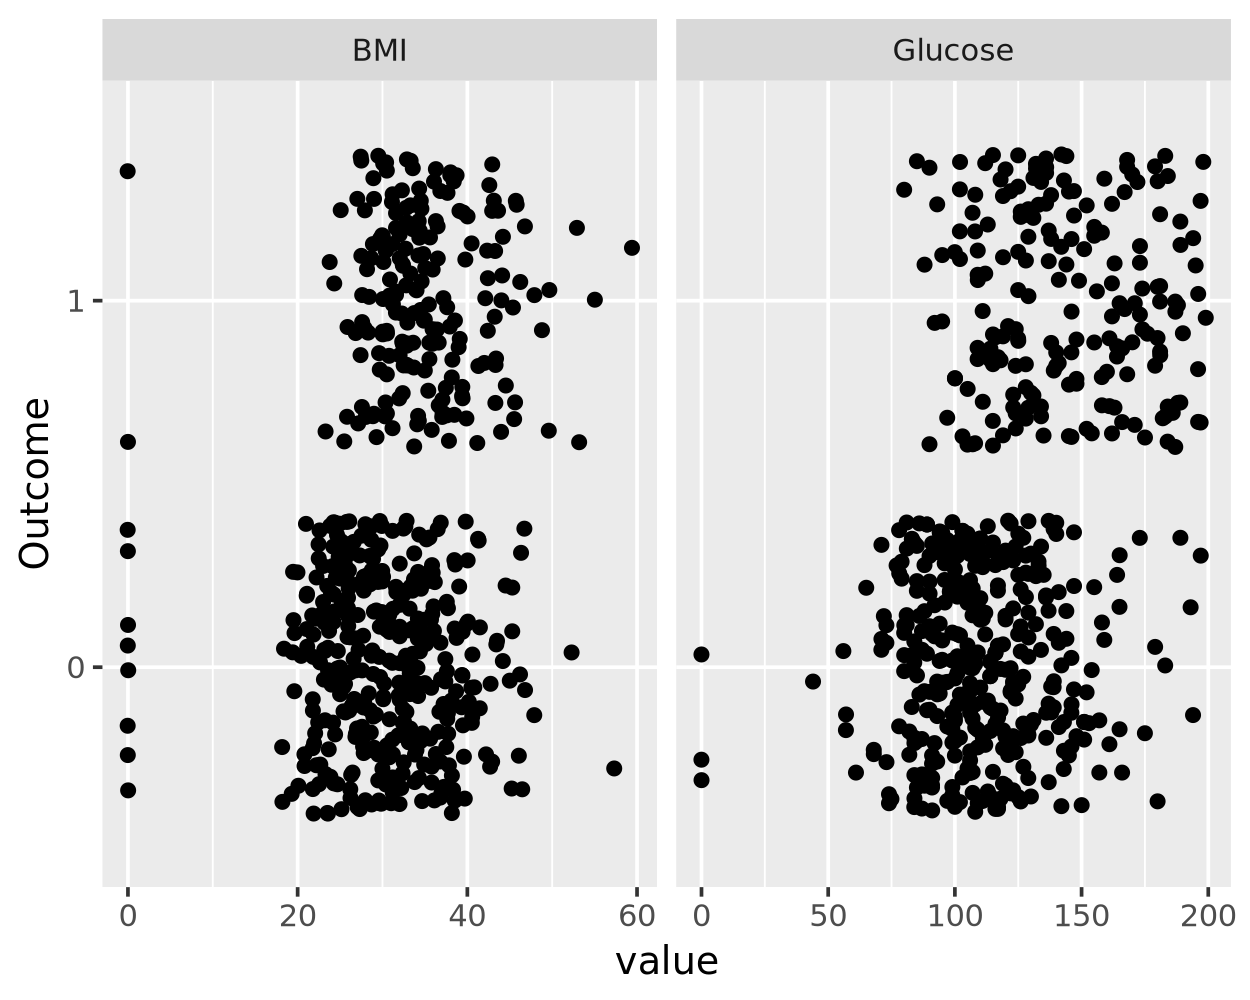

In [51]:
ggplot(plot_df, aes(value, Outcome)) + geom_jitter() + facet_wrap(~name, ncol=2, scales= 'free_x')

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [46]:


mod_fit <- glm(Outcome ~ BMI + Glucose, data = diabetes_train, family = binomial (link = logit))

summary(mod_fit)



Call:
glm(formula = Outcome ~ BMI + Glucose, family = binomial(link = logit), 
    data = diabetes_train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.625010   0.704186 -10.828  < 2e-16 ***
BMI          0.069483   0.015205   4.570 4.89e-06 ***
Glucose      0.037774   0.003929   9.614  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 569.66  on 573  degrees of freedom
AIC: 575.66

Number of Fisher Scoring iterations: 5


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [47]:
diabetes_test_wPred <- augment(mod_fit, newdata = diabetes_test)
head(diabetes_test_wPred)


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,.fitted
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,89,66,23,94,28.1,0.167,21,0,-2.3106657
3,78,50,32,88,31.0,0.248,26,1,-2.5246778
10,115,0,0,0,35.3,0.134,29,0,-0.8282682
1,103,30,38,83,43.3,0.183,33,0,-0.7256913
8,99,84,0,0,35.4,0.388,50,0,-1.4257018
5,117,92,0,0,34.1,0.337,38,0,-0.8361000


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [53]:
diabetes_test_wPred$.pred_class <- as.factor(ifelse(diabetes_test_wPred$.fitted >= 0.5, 1, 0))

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 120  38
         1   5  29

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

1) 67
2) 29
3) 5

